In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
from collections import Counter 

The variables are the following:

**SeriousDlqin2yrs**: Person experienced 90 days past due delinquency or worse (Target variable / label)

**RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

**age**: Age of borrower in years

**NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

**DebtRatio**: Monthly debt payments, alimony,living costs divided by monthy gross income

**MonthlyIncome**: Monthly income

**NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

**NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due.

**NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit

**NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

**NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.)

In [4]:
# Read Training dataset as well as drop the index column
training_data = pd.read_csv('./data/cs-training.csv').drop('Unnamed: 0', axis = 1)


# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-', '').lower())
training_data.columns = cleancolumn

In [5]:
# print the 5 records of the traiing dataset
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
# Describe the all statistical properties of the training dataset
training_data[training_data.columns[1:]].describe()


,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
training_data[training_data.columns[1:]].median()

revolvingutilizationofunsecuredlines       0.154181
age                                       52.000000
numberoftime3059dayspastduenotworse        0.000000
debtratio                                  0.366508
monthlyincome                           5400.000000
numberofopencreditlinesandloans            8.000000
numberoftimes90dayslate                    0.000000
numberrealestateloansorlines               1.000000
numberoftime6089dayspastduenotworse        0.000000
numberofdependents                         0.000000
dtype: float64

In [8]:
training_data[training_data.columns[1:]].mean()

revolvingutilizationofunsecuredlines       6.048438
age                                       52.295207
numberoftime3059dayspastduenotworse        0.421033
debtratio                                353.005076
monthlyincome                           6670.221237
numberofopencreditlinesandloans            8.452760
numberoftimes90dayslate                    0.265973
numberrealestateloansorlines               1.018240
numberoftime6089dayspastduenotworse        0.240387
numberofdependents                         0.757222
dtype: float64

In [9]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(training_data['seriousdlqin2yrs'])
percentage_labels = (training_data['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

seriousdlqin2yrs
0    93.316
1     6.684
Name: count, dtype: float64

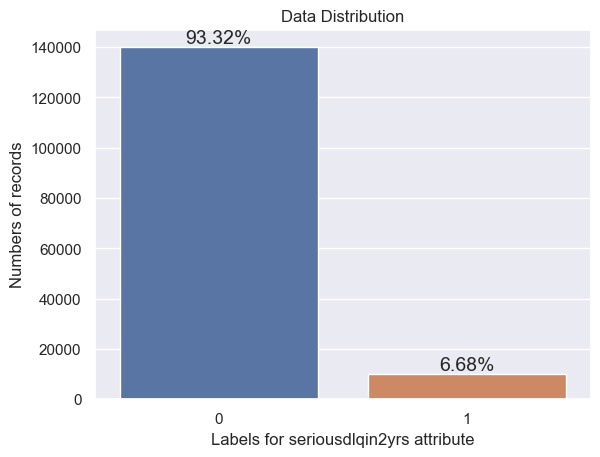

In [10]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(x='seriousdlqin2yrs', data=training_data).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show()

In [11]:
ax

<Axes: title={'center': 'Data Distribution'}, xlabel='Labels for seriousdlqin2yrs attribute', ylabel='Numbers of records'>

In [12]:
# You will get to know which column has missing value and it's give the count that how many records are missing 
training_data.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

In [13]:
# Actual replacement of the missing value using mean value.
training_data_mean_replace = training_data.fillna((training_data.mean()))
training_data_mean_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [14]:
training_data_mean_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [15]:
# Actual replacement of the missing value using median value.
training_data_median_replace = training_data.fillna((training_data.median()))
training_data_median_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [16]:
training_data_median_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

## Correlation

In [17]:
training_data.fillna((training_data.median()), inplace=True)
training_data[training_data.columns[1:]].corr()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
numberoftime3059dayspastduenotworse,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
monthlyincome,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
numberofopencreditlinesandloans,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
numberoftime6089dayspastduenotworse,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678
numberofdependents,0.001193,-0.215693,-0.004590,-0.044476,0.066314,0.074026,-0.011962,0.129399,-0.012678,1.000000


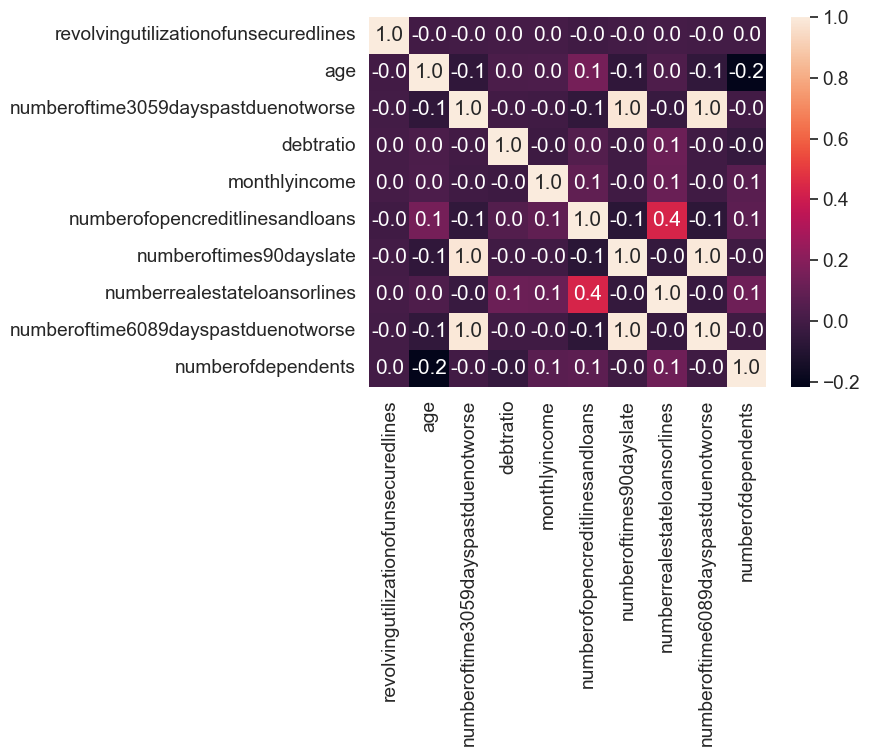

In [18]:
sns.set()
sns.set(font_scale=1.25)
sns.heatmap(training_data[training_data.columns[1:]].corr(),annot = True,fmt=".1f")
plt.show()



## Detecting outliers

In [19]:
def detect_outliers(df, n, features):
    outlier_indices = []
    
    # iterate over features (columns)
    for col in features:
        # 1st quantile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quatile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquatile range (IQR)
        IQR = Q3 - Q1
        
        # Outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # Append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
     # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers


# detect outliers from Age, SibSp , Parch and Fare
# These are the numerical features present in the dataset
Outliers_to_drop = detect_outliers(training_data, 2, ['revolvingutilizationofunsecuredlines',
                                                      'age',
                                                      'numberoftime3059dayspastduenotworse',
                                                      'debtratio', 
                                                      'monthlyincome',
                                                      'numberofopencreditlinesandloans',
                                                      'numberoftimes90dayslate',
                                                      'numberrealestateloansorlines',
                                                      'numberoftime6089dayspastduenotworse',
                                                      'numberofdependents'])

In [20]:
training_data.loc[Outliers_to_drop]

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
900,0,2.258964,33,2,0.032484,2000.0,1,1,0,0,2.0
919,1,1.362142,73,1,274.000000,5400.0,2,3,0,1,0.0
1958,0,1.634551,28,0,151.000000,5400.0,1,3,0,2,0.0
4793,0,3746.000000,52,2,0.481353,2600.0,5,0,1,0,3.0
4852,0,1.566866,46,2,0.104983,6000.0,3,2,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
142226,1,0.859714,55,0,0.599348,11046.0,18,7,6,6,1.0
142830,0,0.889452,47,0,0.411026,8833.0,13,3,1,1,3.0
143782,1,1.000000,38,0,0.250573,5666.0,4,2,1,1,3.0
146360,0,0.921219,45,0,0.092564,3845.0,3,1,0,1,3.0


In [21]:
training_data = training_data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

## Feature Importance

In [22]:
training_data

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
144788,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
144789,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
144790,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0
144791,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [23]:
training_data.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
training_data.columns[1:]

Index(['revolvingutilizationofunsecuredlines', 'age',
       'numberoftime3059dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime6089dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

In [26]:
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs
features_label = training_data.columns[1:]
forest = RandomForestClassifier (n_estimators = 1000, random_state=0, n_jobs = -1)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.207316
 2) age                            0.199069
 3) numberoftime3059dayspastduenotworse 0.162171
 4) debtratio                      0.135042
 5) monthlyincome                  0.094428
 6) numberofopencreditlinesandloans 0.058281
 7) numberoftimes90dayslate        0.042887
 8) numberrealestateloansorlines   0.041656
 9) numberoftime6089dayspastduenotworse 0.034864
10) numberofdependents             0.024287


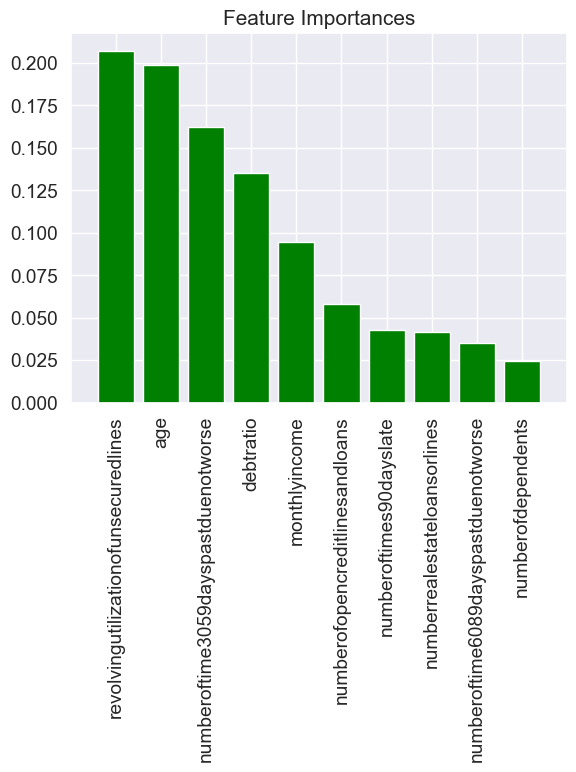

In [27]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## Train and build baseline model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [29]:
X = training_data.drop('seriousdlqin2yrs', axis = 1)
y = training_data.seriousdlqin2yrs

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### KNN model

In [31]:
knMod = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto', leaf_size = 30, p = 2, 
                            metric = 'minkowski', metric_params = None) 

In [32]:
knMod.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
knMod.score(X_test, y_test)

0.9449984806210117

In [34]:
test_labels = knMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels, average = 'macro', sample_weight = None)

0.544161430231558

### Logistic Regression

In [35]:
lgmMod = LogisticRegression(penalty = 'l1', dual = False, tol = 0.0001, C = 1.0, fit_intercept = True, 
                           intercept_scaling = 1, class_weight = None,
                           random_state = None, solver = 'liblinear', max_iter = 100, multi_class = 'ovr',
                           verbose = 2)

In [36]:
lgmMod.fit(X_train, y_train)

[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 1
iter   6  #CD cycles 6
iter   7  #CD cycles 3
iter   8  #CD cycles 2
iter   9  #CD cycles 2
iter  10  #CD cycles 1
iter  11  #CD cycles 3
iter  12  #CD cycles 5
iter  13  #CD cycles 7
iter  14  #CD cycles 1
iter  15  #CD cycles 11
iter  16  #CD cycles 3
iter  17  #CD cycles 1
iter  18  #CD cycles 26
iter  19  #CD cycles 19
iter  20  #CD cycles 5
iter  21  #CD cycles 2
iter  22  #CD cycles 2
optimization finished, #iter = 22
Objective value = 19882.884089
#nonzeros/#features = 11/11


LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear',
                   verbose=2)

In [37]:
lgmMod.score(X_test, y_test)

0.9479543633802039

In [38]:
test_labels = lgmMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels, average = 'macro', sample_weight = None)

0.7971192541477103

### AdaBoost

In [40]:
adaMod = AdaBoostClassifier(base_estimator = None, n_estimators = 200, learning_rate = 1.0)
adaMod.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=None, n_estimators=200)

In [41]:
adaMod.score(X_test, y_test)

0.9475123622199508

In [43]:
test_labels = adaMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels, average = 'macro', sample_weight = None)

0.8507288463832888

### Gradient Boosting

In [46]:
gbMod = GradientBoostingClassifier(loss = 'log_loss', learning_rate = 0.1, n_estimators = 100,
                               subsample = 1.0, min_samples_split = 2, min_samples_leaf = 1,
                               min_weight_fraction_leaf = 0, max_depth = 3, init = None,
                               random_state = None, max_features = None, verbose = 0)
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(min_weight_fraction_leaf=0)

In [47]:
gbMod.score(X_test, y_test)

0.9484792397580044

In [49]:
test_labels = gbMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels, average ='macro', sample_weight = None)

0.8559845452791424

### Random Forests

In [51]:
rfMod = RandomForestClassifier(n_estimators = 10, criterion = 'gini', max_depth = None, min_samples_split = 2,
                              min_samples_leaf = 1, min_weight_fraction_leaf =0.0, max_features = 'sqrt',
                              max_leaf_nodes = None, bootstrap= True, oob_score= False, n_jobs= 1,
                                random_state= None, verbose = 0)
rfMod.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=1)

In [52]:
rfMod.score(X_test, y_test)

0.9451089809110749

In [53]:
test_labes = rfMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels, average = 'macro', sample_weight = None)

0.8559845452791424

### Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score
def cvDictgener(functions, scr, X_train = X, y_train = y, cv =5, verbose = 1):
    cvDict = {}
    for func in functions: 
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, verbose = verbose, scoring = scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
        
    return cvDict

In [55]:
cvD = cvDictgener(functions = [knMod, lgmMod, adaMod, rfMod, gbMod], scr = 'roc_auc')
cvD

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 1
iter   6  #CD cycles 4
iter   7  #CD cycles 2
iter   8  #CD cycles 1
iter   9  #CD cycles 3
iter  10  #CD cycles 8
iter  11  #CD cycles 8
iter  12  #CD cycles 1
iter  13  #CD cycles 7
iter  14  #CD cycles 3
iter  15  #CD cycles 1
iter  16  #CD cycles 8
iter  17  #CD cycles 15
iter  18  #CD cycles 6
iter  19  #CD cycles 1
iter  20  #CD cycles 10
iter  21  #CD cycles 3
iter  22  #CD cycles 15
iter  23  #CD cycles 1
iter  24  #CD cycles 9
iter  25  #CD cycles 12
optimization finished, #iter = 25
Objective value = 20961.893632
#nonzeros/#features = 11/11
[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 1
iter   6  #CD cycles 5
iter   7  #CD cycles 7
iter   8  #CD cycles 1
iter   9  #CD cycles 13
iter  10  #CD cycles 1
iter  11  #CD cycles 4
iter  12  #CD cycles 1
iter  13  #CD cycles 12
iter 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   54.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min finished


{'KNeighborsClassifier': [0.551503240700362, 0.0016116165486371754],
 'LogisticRegression': [0.785656341118292, 0.005734575207589309],
 'AdaBoostClassifier': [0.8396378052502538, 0.0028485974221895485],
 'RandomForestClassifier': [0.7452650104372921, 0.0045813001865367],
 'GradientBoostingClassifier': [0.8436501945024618, 0.002881397389085888]}

### Hyper parameters

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

### AdaBoost

In [59]:
adaHyperParams = {'n_estimators': [10,50,100,200,420]}
gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, y_train)  

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ....................................n_estimators=10; total time=   0.5s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=50; total time=   2.0s
[CV] END ....................................n_estimators=50; total time=   2.0s
[CV] END ....................................n_estimators=50; total time=   2.1s
[CV] END ....................................n_estimators=50; total time=   2.1s
[CV] END ....................................n_estimators=50; total time=   2.1s
[CV] END ...................................n_estimators=100; total time=   4.4s
[CV] END ...................................n_est

In [60]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 100}, 0.835744509633242)

### Gradient Boost

In [62]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....loss=exponential, max_depth=9, n_estimators=137; total time=  37.0s
[CV] END ....loss=exponential, max_depth=9, n_estimators=137; total time=  37.2s
[CV] END ....loss=exponential, max_depth=9, n_estimators=137; total time=  37.6s
[CV] END ....loss=exponential, max_depth=9, n_estimators=137; total time=  37.5s
[CV] END ....loss=exponential, max_depth=9, n_estimators=137; total time=  38.7s
[CV] END .......loss=deviance, max_depth=5, n_estimators=156; total time=   0.0s
[CV] END .......loss=deviance, max_depth=5, n_estimators=156; total time=   0.0s
[CV] END .......loss=deviance, max_depth=5, n_estimators=156; total time=   0.0s
[CV] END .......loss=deviance, max_depth=5, n_estimators=156; total time=   0.0s
[CV] END .......loss=deviance, max_depth=5, n_estimators=156; total time=   0.0s
[CV] END ....loss=exponential, max_depth=7, n_estimators=178; total time=  38.8s
[CV] END ....loss=exponential, max_depth=7, n_es

In [66]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 6, 'n_estimators': 191},
 0.8354065024870649)

### Train models with the Hyper parameters

In [67]:
HpGbMod = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [68]:
HpAdaMod = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [69]:
cvDictHPpara = cvDictgener(functions = [HpGbMod, HpAdaMod], scr = 'roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.7s finished


In [70]:
cvDictHPpara

{'GradientBoostingClassifier': [0.8414097212159113, 0.0031491965303500386],
 'AdaBoostClassifier': [0.839918237910944, 0.0030064130129400742]}

In [71]:
test_labels = HpGbMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels, average = 'macro',sample_weight = None)

0.8517199384475403

In [72]:
test_labels = HpAdaMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels, average = 'macro',sample_weight = None)

0.851268079660114

### Voting Classifier

In [76]:
from sklearn.ensemble import VotingClassifier

votingMod = VotingClassifier(estimators = [('gb', HpGbMod), ('ada', HpAdaMod)],
                            voting = 'soft', weights = [2,1])
votingMod.fit(X_train, y_train)

VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(loss='exponential',
                                                         max_depth=6,
                                                         min_weight_fraction_leaf=0,
                                                         n_estimators=191)),
                             ('ada',
                              AdaBoostClassifier(base_estimator=None,
                                                 n_estimators=100))],
                 voting='soft', weights=[2, 1])

In [77]:
votingMod.score(X_test, y_test)

0.9477333628000774

In [78]:
test_labels = votingMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test, test_labels, average= 'macro' ,sample_weight= None)

0.8516391558092081

## Testing on New data

In [93]:
new_test_data = pd.read_csv('./data/cs-test.csv').drop('Unnamed: 0', axis=1)

clean_columns = []
for i in range(len(new_test_data.columns)):
    clean_columns.append(new_test_data.columns[i].replace('-', '').lower())
new_test_data.columns = clean_columns

In [94]:
new_test_data.drop(['seriousdlqin2yrs'], axis= 1, inplace = True)
new_test_data.fillna((training_data.median()), inplace = True)
new_test_data.head()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [96]:
len(new_test_data)

101503

In [99]:
test_labels_votingMod = votingMod.predict_proba(np.array(new_test_data.values))[:,1]
output = pd.DataFrame({'ID': new_test_data.index, 'Proba of default': test_labels_votingMod})
output.to_csv("./predictions.csv", index = False)